In [1]:
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from math import pi, cos, sin
from scipy.fft import fft, fftfreq, fftshift

In [41]:
dataset = [
    [160, 210, 120, 80, 70, 60, 220, 155, 230],
    [100, 140, 180, 160, 55, 45, 78, 120, 155],
    [267, 371, 305, 225, 123, 100, 302, 279, 389],
    [75, 89, 80, 45, 123, 89, 99, 100, 67]
]


cluster_centers = np.array([[0, 0, 0, 0], [10, 13, 21, 51]])

In [42]:
means = np.mean(np.transpose(dataset), axis=0)
std = np.std(np.transpose(dataset), axis=0)

norm = np.divide(np.subtract(np.transpose(dataset), means), std)
print(norm)
print("\n")
cov = np.matmul(np.transpose(norm), norm)
print(cov)

[[ 0.24019223 -0.3251241   0.04990271 -0.48821654]
 [ 1.040833    0.55491106  1.1620202   0.18042785]
 [-0.40032038  1.43494622  0.45625333 -0.24941497]
 [-1.040833    0.99492864 -0.39922167 -1.92102596]
 [-1.20096115 -1.31516365 -1.48995229  1.80427853]
 [-1.36108931 -1.53517244 -1.73590135  0.18042785]
 [ 1.20096115 -0.80914344  0.42417302  0.65803099]
 [ 0.16012815  0.11489348  0.17822396  0.70579131]
 [ 1.36108931  0.88492424  1.35450208 -0.87029905]]


[[ 9.          2.8095607   7.98797466 -0.52387231]
 [ 2.8095607   9.          6.3864259  -5.88173722]
 [ 7.98797466  6.3864259   9.         -2.93699158]
 [-0.52387231 -5.88173722 -2.93699158  9.        ]]


In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init=cluster_centers, n_init=1)
kmeans.fit(np.transpose(dataset))
print(kmeans.cluster_centers_)

[[220.         124.33333333 354.          85.        ]
 [107.5        110.         216.5         85.33333333]]


In [45]:
dataset = pd.DataFrame(np.array(dataset), index={'BP', 'HR', 'LVET', 'PEP'})
labels = ['N', 'N', 'N', 'HF', 'HF', 'HF', 'N', 'N', 'HF']
target_colors = ['b', 'b', 'b', 'r', 'r', 'r', 'b', 'b', 'r']

In [46]:
dataset = np.round(((dataset - dataset.mean()) / dataset.std()).T, decimals=2)

In [47]:
pca = PCA(n_components=4)
output = pd.DataFrame(
    pca.fit_transform(dataset),
    columns={'PC1', 'PC2', 'PC3', 'PC4'}
)

In [48]:
pervar = np.round(pca.explained_variance_ratio_ * 100, decimals=2)
print('eigenvectors >> \n', np.round(pca.components_, decimals=2))
print('eigenvalues >> \n', np.round(pca.singular_values_ ** 2, decimals=2))
print('evr% >> ', pervar)

eigenvectors >> 
 [[-0.19 -0.46 -0.19  0.84]
 [-0.73  0.65 -0.09  0.17]
 [-0.42 -0.33  0.84 -0.09]
 [-0.5  -0.5  -0.5  -0.5 ]]
eigenvalues >> 
 [5.88 1.86 0.08 0.  ]
evr% >>  [75.17 23.75  1.08  0.  ]


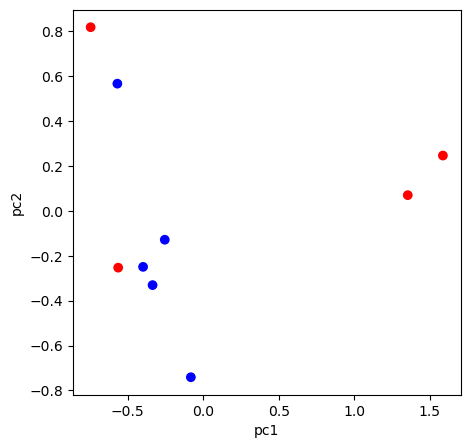

In [49]:
plt.figure(figsize=(5, 5))
plt.scatter(output.iloc[:, 0], output.iloc[:, 1],
            c=target_colors, cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

axis = fig.add_subplot(111, projection='3d')
"""
# x[:,0]is pc1,x[:,1] is pc2 while x[:,2] is pc3
""" 
axis.scatter(output.iloc[:, 0], output.iloc[:, 1],
             output.iloc[:, 2], c=target_colors, cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)
plt.show()

In [51]:
pca = PCA(0.75)
output = pca.fit_transform(dataset)
# output = pd.DataFrame(output, columns={'PC1', 'PC2', 'PC3', 'PC4'})
pervar = np.round(pca.explained_variance_ratio_ * 100, decimals=2)
print('eigenvectors >> \n', np.round(pca.components_, decimals=2))
print('eigenvalues >> \n', np.round(pca.singular_values_ ** 2, decimals=2))
print('evr% >> ', pervar)

eigenvectors >> 
 [[-0.19 -0.46 -0.19  0.84]]
eigenvalues >> 
 [5.88]
evr% >>  [75.17]


In [52]:
Y = [
    1.0872, 0.1347, 0.0847,
    0.6020, 0.7925, 0.1781,
    -0.7778, -1.1272, -0.4220,
    0.7722
]

t = np.arange(0, 90, 10)
sp = fftshift(fft(Y))
freq = fftshift(fftfreq(t.shape[-1]))
print("sp >>", sp)
print("freq >>", freq)

sp >> [0.2048    -0.j         0.25318278-0.13504569j 0.48138074-0.42708353j
 2.24786722-2.81831005j 1.68896926+2.67475335j 1.3244    -0.j
 1.68896926-2.67475335j 2.24786722+2.81831005j 0.48138074+0.42708353j
 0.25318278+0.13504569j]
freq >> [-0.44444444 -0.33333333 -0.22222222 -0.11111111  0.          0.11111111
  0.22222222  0.33333333  0.44444444]
